In [1]:
# Import Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
# Import data file
divvy_df = pd.read_csv('Divvy_Trips_2019_Q3.csv')
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [3]:
divvy_df.shape

(1640718, 12)

In [4]:
# Remove null rows (if needed)
divvy_df.dropna(inplace=True)
divvy_df.shape

divvy_df


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1640713,25223635,2019-09-30 23:56:27,2019-10-01 00:06:20,5690,593.0,84,Milwaukee Ave & Grand Ave,134,Peoria St & Jackson Blvd,Subscriber,Male,1993.0
1640714,25223636,2019-09-30 23:57:02,2019-10-01 00:02:13,5079,310.0,268,Lake Shore Dr & North Blvd,85,Michigan Ave & Oak St,Subscriber,Male,1992.0
1640715,25223637,2019-09-30 23:57:45,2019-10-01 00:01:41,5535,235.0,423,University Ave & 57th St,426,Ellis Ave & 60th St,Customer,Male,2000.0
1640716,25223638,2019-09-30 23:57:47,2019-10-01 00:04:41,6120,414.0,110,Dearborn St & Erie St,31,Franklin St & Chicago Ave (Temp),Subscriber,Male,1986.0


In [5]:
# Convert birthyear to age
divvy_df['age'] = (2021 - divvy_df['birthyear'])
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,29.0
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,31.0
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,26.0
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,51.0
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,28.0


In [6]:
# Create bins for age
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create the names for the five bins
group_names = ["11-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
divvy_df["Age Group"] = pd.cut(divvy_df["age"], bins, labels=group_names, include_lowest=True)
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,29.0,20-29
5,23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,31.0,30-39
18,23479406,2019-07-01 00:06:51,2019-07-01 00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,26.0,20-29
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,51.0,50-59
21,23479409,2019-07-01 00:08:40,2019-07-01 00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,28.0,20-29


In [7]:
#Review bins
divvy_df['Age Group'].value_counts()

30-39    513181
20-29    494762
40-49    170650
50-59    118804
60-69     45411
11-19      5431
70-79      4601
80-89       178
Name: Age Group, dtype: int64

In [8]:
# Plot bins as bar graph

In [9]:
# Convert date columns to datetime format
divvy_df['start_time'] = pd.to_datetime(divvy_df['start_time'])
divvy_df['end_time'] = pd.to_datetime(divvy_df['end_time'])

In [10]:
# Split date from time and create columns
divvy_df['start_date'] = divvy_df['start_time'].dt.date
divvy_df['start_time'] = divvy_df['start_time'].dt.time
divvy_df['end_date'] = divvy_df['end_time'].dt.date
divvy_df['end_time'] = divvy_df['end_time'].dt.time
divvy_df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group,start_date,end_date
0,23479388,00:00:27,00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,29.0,20-29,2019-07-01,2019-07-01
5,23479393,00:02:21,00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,31.0,30-39,2019-07-01,2019-07-01
18,23479406,00:06:51,00:26:22,2758,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,26.0,20-29,2019-07-01,2019-07-01
20,23479408,00:08:24,00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,51.0,50-59,2019-07-01,2019-07-01
21,23479409,00:08:40,00:27:50,6336,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,28.0,20-29,2019-07-01,2019-07-01


In [11]:
# Organize columns in dataframe
divvy_df = divvy_df[["trip_id", "bikeid", "start_date", "start_time", "end_date", "end_time", "tripduration", "from_station_id", "from_station_name", "to_station_id", "to_station_name", "usertype", "gender", "birthyear", "age", "Age Group"]]
divvy_df.head()

,trip_id,bikeid,start_date,start_time,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,Age Group
0,23479388,3591,2019-07-01,00:00:27,2019-07-01,00:20:41,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,29.0,20-29
5,23479393,4941,2019-07-01,00:02:21,2019-07-01,00:07:31,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990.0,31.0,30-39
18,23479406,2758,2019-07-01,00:06:51,2019-07-01,00:26:22,"1,171.0",624,Dearborn St & Van Buren St,237,MLK Jr Dr & 29th St,Subscriber,Male,1995.0,26.0,20-29
20,23479408,2447,2019-07-01,00:08:24,2019-07-01,00:20:07,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,51.0,50-59
21,23479409,6336,2019-07-01,00:08:40,2019-07-01,00:27:50,"1,150.0",257,Lincoln Ave & Waveland Ave,295,Broadway & Argyle St,Subscriber,Male,1993.0,28.0,20-29


In [12]:
# Number of unique bikes in circulation
divvy_df['bikeid'].nunique()

5783

In [13]:
# Bike IDs with most activity

divvy_df['bikeid'].value_counts()

5344    462
3770    457
717     453
5634    445
3333    443
       ... 
5098      1
6254      1
1806      1
2292      1
3310      1
Name: bikeid, Length: 5783, dtype: int64

In [14]:
# Most popular starting stations
divvy_df['from_station_name'].value_counts()


Canal St & Adams St               19106
Streeter Dr & Grand Ave           18363
Clinton St & Madison St           17965
Clinton St & Washington Blvd      16068
Lake Shore Dr & North Blvd        13944
                                  ...  
South Chicago Ave & Elliot Ave        4
Rhodes Ave & 71st St                  3
Racine Ave & 65th St                  3
Carpenter St & 63rd St                1
Racine Ave & 61st St                  1
Name: from_station_name, Length: 612, dtype: int64

In [15]:
# Most popular ending stations

divvy_df['to_station_name'].value_counts()

Streeter Dr & Grand Ave         20143
Lake Shore Dr & North Blvd      18248
Clinton St & Washington Blvd    17347
Canal St & Adams St             16149
Clinton St & Madison St         15792
                                ...  
Rhodes Ave & 71st St                3
Damen Ave & 59th St                 3
Michigan Ave & 71st St              3
Vincennes Ave & 75th St             1
Racine Ave & 61st St                1
Name: to_station_name, Length: 612, dtype: int64

In [16]:
# Most popular trips *still in-progress*
popular_stations = divvy_df.groupby(['from_station_name','to_station_name'])
popular_stations

In [17]:
# Groupby usertype for ridership breakdown

usertype_df = divvy_df.groupby('usertype')
usertype_df.count()

,trip_id,bikeid,start_date,start_time,end_date,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,gender,birthyear,age,Age Group
usertype,,,,,,,,,,,,,,,
Customer,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214116,214096
Subscriber,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1139252,1138922


In [18]:
# Create calculation for average trip duration



In [19]:
divvy_df['gender'].value_counts()

Male      957353
Female    396015
Name: gender, dtype: int64

In [20]:
# - Gender %
usertype_df = divvy_df.groupby('gender')

#Count number of trip_id for each gender
count_number_gender = divvy_df['trip_id'].nunique()

#Count number of each gender
gender_type_number = usertype_df['trip_id'].nunique()
usertype_df.count()

#Calculate percentage for genders
percent_gender =  gender_type_number / count_number_gender * 100


#Make df of gender demographics
gender_demographics_df = pd.DataFrame({'Total Count':gender_type_number,
                                       'Percentage of Gender':percent_gender})

#Display gender count, in decending order
gender_demographics_df.sort_values('Total Count', ascending = False).style.format({'Percentage of Players':'{:.2f}%'})

,Total Count,Percentage of Gender
gender,,
Male,957353,70.738557
Female,396015,29.261443


Text(0.5, 1.0, 'Total Divvy Riders based on Gender')

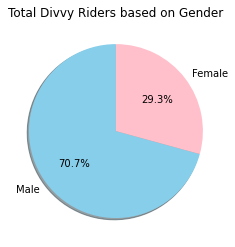

In [22]:
# Generate a pie plot showing the distribution of female versus male 

gender_data = divvy_df['gender'].value_counts()

labels = ['Male','Female']

colors = ['skyblue', 'pink']

#gender_data.plot(kind = 'pie', autopct = '%1.1f%%')

plt.pie(gender_data, labels= labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Total Divvy Riders based on Gender")

In [31]:
# Find number of each gender for each usertype

usertype_df['usertype'].value_counts()

gender  usertype  
Female  Subscriber    313303
        Customer       82712
Male    Subscriber    825949
        Customer      131404
Name: usertype, dtype: int64

Text(0.5, 1.0, 'Riders based on Usertype and Gender')

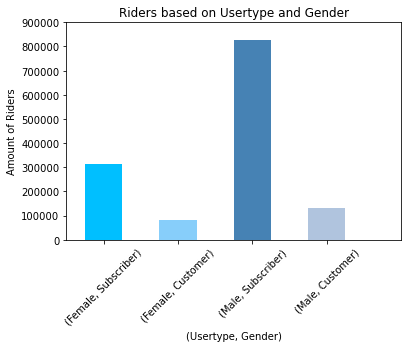

In [41]:
# Plot number of each Gender based on Usertype- Bar Graph

split_gender_data = usertype_df['usertype'].value_counts()

color_list = ["deepskyblue", "lightskyblue", "steelblue", "lightsteelblue"]

gender_chart = split_gender_data.plot(kind = 'bar', color = color_list, rot = 45)
gender_chart.set_xlim([-0.5,4])
gender_chart.set_ylim([0,900000])

gender_chart.set_ylabel("Amount of Riders")
gender_chart.set_xlabel("(Usertype, Gender)")
gender_chart.set_title("Riders based on Usertype and Gender")

Text(0.5, 1.0, 'Riders based on Usertype and Gender')

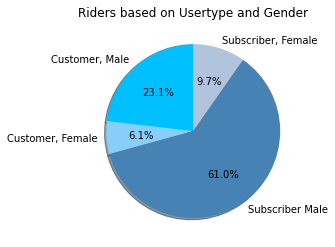

In [34]:
# Plot percentages based on Usertype and Gender- Pie Chart

gender_by_usertype = usertype_df['usertype'].value_counts()

colors = ["deepskyblue", "lightskyblue", "steelblue", "lightsteelblue"]

labels= ["Customer, Male", "Customer, Female", "Subscriber Male", "Subscriber, Female"]

plt.pie(gender_by_usertype, labels = labels, colors= colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("Riders based on Usertype and Gender")


Text(0.5, 1.0, 'Riders based on Customer Gender')

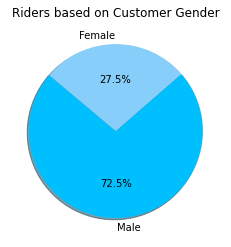

In [35]:
# Plot percentages based on Subscriber Gender- Pie Chart

labels = ['Male', 'Female']

sizes = [825949,313303]

gender_by_usertype = usertype_df['gender'].value_counts()

colors = ["deepskyblue", "lightskyblue"]

plt.pie(sizes, labels= labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Riders based on Customer Gender")

Text(0.5, 1.0, 'Riders based on Subscriber Gender')

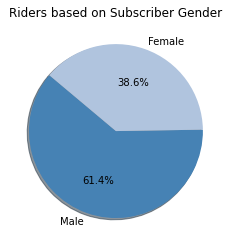

In [36]:
# Plot percentages based on Customer Gender- Pie Chart

labels = ['Male', 'Female']

sizes = [131404,82712]

gender_by_usertype = usertype_df['gender'].value_counts()

colors = ["steelblue", "lightsteelblue"]

plt.pie(sizes, labels= labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Riders based on Subscriber Gender")

In [ ]:

# - Age groups and bins for histogram
# - Average trip duration 